# NumPy Fundamentals for Data Science and Machine Learning

***Note***: **this is part I of a III part series I am working right now**

---

It is no exaggeration to say that **NumPy is at the core of the entire scientific computing Python ecosystem**, both as a standalone package for numerical computation and as the engine behind most data science packages.

In this document, I review `NumPy` main components and functionality, with attention to the needs of Data Science and Machine Learning practitioners, and people who aspire to become a data professional. My only assumption is that you have basic familiarity with Python, things like variables, lists, tuples, and loops. Advance Python concepts like Object Oriented Programming are not touched at all.

The resources I used to build this tutorial are three:

1. `NumPy` documentation
2. A few miscellaneous articles from the Internet
3. My own experience with `NumPy`

Content-wise, I'll say that ~95% is based on `NumPy` v1.18 manual, in particular:  

- [NumPy user guide](https://numpy.org/doc/stable/user/index.html)
- [NumPy reference](https://numpy.org/doc/stable/reference/index.html)
- [NumPy about](https://numpy.org/doc/stable/about.html)

The rest ~5% comes from a couple of random articles on the Internet and Stack Overflow. I resort to those sources mostly to clarify concepts and functionality that wasn't clear for me from `NumPy` documentation.

My own experience was the base to organize the tutorial, explain concepts, create practical examples, create images, etc. 

"*Why are you using the documentation as the main source of content, instead of the many great tutorials online?*" Because it is the most up-to-date, complete, and reliable source about `NumPy` (and about any library for that matter).

"*Why then I should read this if everything comes from the documentation?*" Well, you don't need to read this, you are right. Actually, I encourage you to read the documentation and learn from there. What I can offer is my own: **(1) organization of contents, (2) selection of contents, (3) explanations and framing of concepts, (4) images, (5) practical examples, (6) and general perspective.** 

This tutorial is part of a larger project I am working on, which is an introduction to Python and its libraries for scientific computing, data science, and machine learning that you can find [here](https://github.com/pabloinsente/intro-sc-python). 

If you want to interact with this Notebook, you can open a MyBinder interactive instance by clicking in the MyBinder icon:

**To open MyBinder** -> [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/pabloinsente/intro-sc-python/master/?urlpath=lab)

As a final note, **if you are `NumPy` expert, advanced user, or developer**, you may find some inaccuracies or lack of depth in some of my explanations. Two things: (1) feel free to suggest a better explanation or something that I may add to make things clearer, (2) I prioritize consciousness and accessibility over the accuracy, so the lack of accuracy or depth sometimes it is intentional from my part. 

If you have any questions or suggestion feel free to reach me out to at pcaceres@wisc.edu
Here is my [Twitter](https://twitter.com/CodeBug88), [LinkedIn](https://www.linkedin.com/in/pabloascm/), and [personal site](https://pablocaceres.org/). 

## Table of contents

- [Python is slow](#python-is-slow)
- [What is NumPy](#what-is-numpy)
- [Installing NumPy](#installing-numpy)
- [NumPy Arrays](#numpy-arrays)
- [Array creation](#array-creation)
    - [Conversion from other Python structures](#conversion-from-other-python-structures)
    - [Intrinsic NumPy array creation objects](#intrinsic-numpy-array-creation-objects) 
    - [Use of special library functions](#use-of-special-library-functions)
- [Vectorization](#vectorization)
- [Array data type and conversions](#array-data-type-and-conversions)
- [Array mathematics and element-wise operations](#array-mathematics-and-element-wise-operations)
    - [Array arithmetic](#array-arithmetic)
    - [Trigonometric functions](#trigonometric-functions)
    - [Hyperbolic functions](#hyperbolic-functions)
    - [Rounding](#rounding)
    - [Other miscellaneous element-wise operations](#other-miscellaneous-element-wise-operations)
- [Array data type and conversions](#array-data-type-and-conversions)
- [Array manipulation](#array-manipulation)
    - [Array shape manipulation](#array-shape-manipulation)
    - [Array transpose-like operations](#array-transpose-like-operations)
    - [Array dimension manipulation](#array-dimension-manipulation)
    - [Array broadcasting](#array-broadcasting)
    - [Joining arrays](#joining-arrays)
    - [Splitting arrays](#splitting-arrays)
    - [Array repetition](#array-repetition)
    - [Adding and removing array elements](#adding-and-removing-array-elements)
    - [Rearranging array elements](#rearranging-array-elements)

**Future sections for part II and III**: 

- [NumPy universal functions]
- [Array indexing]
- [Array masking]
- [Array copy and views]
- [Array logic and evaluation]
- [Basic statistics with NumPy]
- [Basic linear algebra with NumPy]
- [NumPY Random sampling]
- [Array string operations]
- [NumPY datetime functions]
- [Structured arrays]
- [Array iteration]
- [NumPy constants and scalars]
- [Input-output (I/O) data processing]
- [Resources to learn more]

## Python is slow

Scientific and numerical computing often requires processing massive datasets with complex algorithms. If you are a scientist or data professional, you want a programming language than can process data FAST. **The closer a programming language is to machine instructions (binary), the faster it runs**. That's why for decades, programs like C, C++, and Fortran, were the to-go option for data-intensive applications in science and technology. 

However, writing code in compiled languages like C++ and Fortran can be slow and, frankly, terribly annoying (but that's just me!). Scientists are not coders (although many end up mutating into scientist-coder hybrids over time, that's a whole other subject). From a scientist's perspective, **the easier and faster to write code, the better**. High-level programming languages, i.e., languages that are closer to human language rather than to machine language do meet such requirements. The likes of Python, PHP, JavaScript, and Ruby, fits the bill: **easy to write, easy to learn, easy to run**. But, instructions written in high-level programming languages are slow to run by computers, for complicated reasons I do not explore here. The fact is that they are slower to run than C++ or Fortran.

Scientists face a conundrum: they need an **easy to write** AND **fast to run** programming language. They need the best of both worlds. For a long time, such language simply did not exist. Then Python came along.

Oh wait, Python it is, indeed, easy to learn and write, *but slow to run compared to compiled languages*. Like really, really slow. For instance, computing the [spectral-norm of a matrix](https://en.wikipedia.org/wiki/Matrix_norm), which is a common task in data applications, [has been benchmarked](https://benchmarksgame-team.pages.debian.net/benchmarksgame/performance/spectralnorm.html) at ~1.9 seconds in C, whereas python takes a whopping ~170.1 seconds, meaning that Python is ~90 times *slower*. Considering this, the fact Python became the dominant language in machine learning and data science is a bit of a puzzle.

There are at least two reasons for this why Python succeed anyways. 

The first is that as computing capacity became cheaper, **processing time has become less important than coding-time**. Basically, the time you save by writing code in high-level yet slow to-run programming languages compensates by their lack of performance at run time. And Python is exceptionally clean, intuitive, and easy to learn, compared to C or Fortran.

The second reason, which is probably the major one, is **libraries**. Particularly libraries are written in low-level high-performant languages. Turns out that Python extensibility allows programmers to write the "engine" for numerical computation in languages like C and Fortran, and then Python can invoke such "engines" in the background, meaning that although you write code in Python, it is executed in compiled C or Fortran code instead of Python itself. And that is how you obtain the best of both worlds: **the easy and fast developing time of Python, plus the runtime performance of C or Fortran**. True, there is some small overhead of going back and forth between languages, but its impact it's minimal. 

It is important to mention that nowadays, new programming languages have been created exactly with these two necessities (fast development + fast performance) in mind, like **[Julia](https://julialang.org/)**. In the spectral-norm test, Julia was benchmarked at ~2.79 seconds, almost as fast as C. Additionally, Julia is a dynamic language, easy to learn, and write in like Python. Why not Julia then? Probably because of the relative immaturity of its packages ecosystem compared to Python. Julia first appeared in 2012, whereas Python was introduced in 1990. The availability of well-tested libraries for pretty much anything you can imagine in Python is unparalleled. A second reason is probably that Python does not cost you performance anyways (with its libraries), so Why not? 

## What is NumPy

It is no exaggeration to say that **NumPy is at the core of the entire scientific computing Python ecosystem**, both as a standalone package for numerical computation and as the engine behind most data science packages.

NumPy is a package for array-like or matrix-like high-performance computation. Its "engine" is written in C, meaning that NumPy utilized "in the background" pre-compiled C code to perform computations. 

## Installing NumPy


If you are running this Notebook in `MyBinder` or locally after running the `pip install -r requirements.txt` file, you have `NumPy` installed already. Otherwise, you will need to install `NumPy` with one of these options:

1. Scientific Python Distributions
2. pip
3. System-wide installation via a package manager (apt, brew, etc.)
4. From NumPy source code

Option 4 is for developers who need to alter source code. Option 3 is not recommended as a system-wide installation of packages may generate dependency conflicts. 

Option 1 is probably the simplest and it's widely used by practitioners. Within this category we have:

- [Anaconda](https://www.anaconda.com/products/individual)
- [Mini-conda](https://docs.conda.io/en/latest/miniconda.html)
- [WinPython](https://winpython.github.io/)
- [Pyzo](https://pyzo.org/)

WinPython and Pyzo are less used and I do not have any experience with them. Feel free to experiment with them at your own risk. Anaconda and mini-conda are the most popular options. Anaconda basically is a large bundle of packages for Python and R, and a package manager. Mini-conda is a lightweight version of Anaconda.  Once you install Anaconda or mini-conda, `NumPy` will be available within the conda installation. 

I do not like and do not use Anaconda or mini-conda. I just see no reason to install hundreds of libraries I most likely never use. I also see no reason to duplicate functionality which is already provided in the standard Python installation. It just occupies memory and you also need to learn how to use `conda`, which sometimes introduces hard to understand issues with multiple Python and packages installations. Yet, many people recommend and use this method. If you decide to use it, go to the [Anaconda](https://www.anaconda.com/products/individual) or [Mini-conda](https://docs.conda.io/en/latest/miniconda.html) site and follow the instructions for your system. 

My preferred method is `pip`, which is available out-of-the-box with your Python installation. To install `NumPy` is as simple as to run:

```bash
pip3 install numpy
```

Now, I highly recommend to create a virtual environment, activate the environment, and then install `NumPy` within that. It boils down to copy-pasting the following in your terminal:

```bash
# create the virtual environment
python3 -m venv venv

# activate the virtual environment
source venv/bin/activate

# upgrade pip package manager
pip3 install --upgrade pip

#install numpy
pip3 install numpy
```

The virtual environment will isolate your `NumPy` installation from your system-wide Python installation and other projects you may have in your computer. So, it's safer. This method will save you gigabytes of memory, time, confusion, and effort. But that's just me!

## NumPy arrays

`NumPy` fundamental object is the **[ndarray](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.html)**. Arrays are simply ordered collections of elements, like single numbers, [lists](https://docs.python.org/3/tutorial/datastructures.html), [sets](https://realpython.com/python-sets/), [vectors](https://pabloinsente.github.io/intro-linear-algebra#vectors), [matrices](https://pabloinsente.github.io/intro-linear-algebra#matrices), or [tensors](https://en.wikipedia.org/wiki/Tensor). In Additionally, elements in an array have of **the same type**. For instance, an array can't have integers and text at the same time. 

The "n" in "ndarray" makes references to the arbitrary number of dimensions it can take. An array with one element and one dimension, it's a "singleton" or just a number. An array with four elements and two dimensions is a 2x2 matrix. Put simply, an array is like an Excel sheet with the caveat that instead of being restricted to two dimensions, it can be extended to 3, 4, or higher dimensions, and that you can't combine data types in a "sheet". 

In `NumPy`, dimensions are called `axes`, so I will use such term interchangeably with dimensions from now.

Let's see a few examples. 

We first need to import `NumPy` by running:

In [1]:
import numpy as np

Then we can use the `array` method constructor to build an array as:

In [2]:
# 1 axis/dimensions array
one_dim=  np.array([1, 2, 3]) 

# 2 axis/dimensions array
two_dim_1=  np.array([[1, 2, 3]]) 

# 2 axis/dimensions array
two_dim_2= np.array([[1, 2, 3],
                     [4, 5, 6]])
 
# 3 axis/dimensions array
three_dim =  np.array([[[1, 2, 3], 
                        [4, 5, 6]],
                       [[1, 2, 3],
                        [4, 5, 6]]]) 

Visually, we can represent the above arrays as:

<img src="images/numpy-array.svg">

This is how arrays look when printed:

In [3]:
print(f'One-dimensional array with 3 elements:\n{one_dim}\n')
print(f'Two-dimensional array with 1 row and 3 cols:\n{two_dim_1}\n')
print(f'Two-dimensional array with 2 row and 3 cols:\n{two_dim_2}\n')
print(f'Three-dimensional array:\n{three_dim}')

One-dimensional array with 3 elements:
[1 2 3]

Two-dimensional array with 1 row and 3 cols:
[[1 2 3]]

Two-dimensional array with 2 row and 3 cols:
[[1 2 3]
 [4 5 6]]

Three-dimensional array:
[[[1 2 3]
  [4 5 6]]

 [[1 2 3]
  [4 5 6]]]


We can inspect and confirm **dimensionality** as:

In [4]:
print(f'Number of dimensions array one: {one_dim.ndim}')
print(f'Number of dimensions array two-1: {two_dim_1.ndim}')
print(f'Number of dimensions array two-2: {two_dim_2.ndim}')
print(f'Number of dimensions array three: {three_dim.ndim}')

Number of dimensions array one: 1
Number of dimensions array two-1: 2
Number of dimensions array two-2: 2
Number of dimensions array three: 3


The **shape** of an array must not be confused with its dimensionality, as shape reflects the number of elements along each axis, and dimensionality only the number of axes or dimensions.

In [5]:
print(f'Shape array one: {one_dim.shape}')
print(f'Shape array two-1: {two_dim_1.shape}')
print(f'Shape array two-2: {two_dim_2.shape}')
print(f'Shape array three: {three_dim.shape}')

Shape array one: (3,)
Shape array two-1: (1, 3)
Shape array two-2: (2, 3)
Shape array three: (2, 2, 3)


The first number in the parenthesis represents the number of elements within the first axis/dimension; the second number the number of elements within the second axis/dimension, the third number the number of elements within the third axis/dimensions, and so on. 

For instance, the (2, 2, 3) indicates 2 elements along the first axis, 2 elements along the second axis, and 3 elements along the third axis.

To count the **number of elements** within an array type:

In [6]:
print(f'Number of elements array one:{one_dim.size}')
print(f'Number of elements array two-1:{two_dim_1.size}')
print(f'Number of elements array two-2:{two_dim_2.size}')
print(f'Number of elements array three:{three_dim.size}')

Number of elements array one:3
Number of elements array two-1:3
Number of elements array two-2:6
Number of elements array three:12


`NumPy` utilizes different **data types** (more on this later) to represent data, which can be inspected as:

In [7]:
print(f'Data type array one:{one_dim.dtype}')
print(f'Data type array two-1:{two_dim_1.dtype}')
print(f'Data type array two-2:{two_dim_2.dtype}')
print(f'Data type array three:{three_dim.dtype}')

Data type array one:int64
Data type array two-1:int64
Data type array two-2:int64
Data type array three:int64


## Array creation

`NumPy` offers several alternatives to create arrays.

I will review three cases:

1. Conversion from other Python structures 
2. Intrinsic `NumPy` array creation objects 
3. Use of special library functions

### Conversion from other Python structures 

In the previous section, I used the `array` method to create an array from a Python list. This is an example of array creation from the conversion of an array-like Python object. 

Lists, tuples, and sets are array-like Python objects that serve as options for this method.

In [8]:
array_list = np.array([1, 2, 3])
array_tuple = np.array(((1, 2, 3), (4, 5, 6)))
array_set = np.array({"pikachu", "snorlax", "charizard"})

In [9]:
print(f'Array from list:\n{array_list}\n')
print(f'Array from tuple:\n{array_tuple}\n')
print(f'Array from set:\n{array_set}')

Array from list:
[1 2 3]

Array from tuple:
[[1 2 3]
 [4 5 6]]

Array from set:
{'snorlax', 'pikachu', 'charizard'}


### Intrinsic NumPy array creation objects 

Manual input of data into arrays can be cumbersome, so `NumPy` offers a series of convenience methods to create arrays for special cases, like zeros, ones, and others. Below some common examples.

In [10]:
# zeros
zeros = np.zeros(5)

# ones
ones = np.ones((3, 3))

# arange
arange = np.arange(1, 10, 2)

# empty
empty =  np.empty([2, 2])

# linspace
linespace = np.linspace(-1.0, 1.0, num=10)

# full
full = np.full((3,3), -2)

# indices
indices =  np.indices((3,3))

In [11]:
print(f'Array of zeros:\n{zeros}\n')
print(f'Array of ones:\n{ones}\n')
print(f'Array of empty entries:\n{empty}\n')
print(f'Evenly spaced array in a range:\n{linespace}\n')
print(f'Array with same number on each entry:\n{full}\n')
print(f'Array from indices:\n{indices}\n')

Array of zeros:
[0. 0. 0. 0. 0.]

Array of ones:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

Array of empty entries:
[[4.68663598e-310 6.91134029e-310]
 [0.00000000e+000 0.00000000e+000]]

Evenly spaced array in a range:
[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]

Array with same number on each entry:
[[-2 -2 -2]
 [-2 -2 -2]
 [-2 -2 -2]]

Array from indices:
[[[0 0 0]
  [1 1 1]
  [2 2 2]]

 [[0 1 2]
  [0 1 2]
  [0 1 2]]]



- The `zero` method generates an array of zeros of shape defined by a tuple passed to the function
- The `ones` method generates an array of ones of shape defined by a tuple passed to the function
- The `empty` method generates an empty array (although very small numbers will be printed) of shape defined by a tuple passed to the function
- The `linespace` method generates an array of evenly spaced entries given a range and a step size
- The `full` method returns an array of  shape defined by a tuple passed to the function filled with the same value (third argument outside the tuple)
- The `indices` method generates an array representing the indices of the grid

### Use of special library functions

`NumPy` has a large list of special cases functions that generate arrays, which are too large and seemingly disconnected to enumerate. Here are a few examples:

In [12]:
# diagonal array
diagonal = np.diag([1, 2, 3], k=0)

# identity 
identity = np.identity(3)

# eye
eye = np.eye(4, k=1)

# rand
rand = np.random.rand(3,2)

In [13]:
print(f'Diagonal matrix from array-like structure:\n{diagonal}\n')
print(f'Identity matrix:\n{identity}\n')
print(f'Diagonal matrix with ones and zeros elsewhere:\n{eye}\n')
print(f'Array of random numbers sampled from a uniform distribution:\n{rand}')

Diagonal matrix from array-like structure:
[[1 0 0]
 [0 2 0]
 [0 0 3]]

Identity matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Diagonal matrix with ones and zeros elsewhere:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]

Array of random numbers sampled from a uniform distribution:
[[0.5591643  0.09664011]
 [0.50060969 0.66257198]
 [0.14422846 0.88560737]]


- The `diagonal` function returns an array with the numbers in the diagonal and zeros elsewhere
- The `identity` function returns an identity matrix
- The `eye` function returns an array with ones on the diagonal and zeros elsewhere
- The `random.rand` function returns an array of random numbers sampled from a uniform distribution

## Vectorization

I claimed "pure" Python is slow. One of the culprits of such slowness is Python's loops. Loops are bad for performance for complicated reasons related to Python design as a dynamically typed language. The shortest answer to why loops are slow is that Python takes multiple actions for each call (e.g., it access memory several times, type checking, etc.), that compound and hurt performance the more loops you execute. 

In scientific computing we want speed, meaning we want to get rid of loops. This is precisely what's **vectorization** all about: **getting rid of loops by performing computations on multiple components of a vector at the same time**. Hence, performing operations in "vector" form. In `NumPy`, vectors can be interpreted as an array, so we could call this "arrayization" if you will, but that sounds funny and weird. 

Here is how vectorization looks like conceptually.

<img src= "images/vectorization.svg" >

Now let's compare the performance gain of vectorization against looping in a simple sum. 

In [14]:
x = np.random.rand(100)
y = np.random.rand(100)

Sum two array with a Python loop (non-vectorized)

In [15]:
%%timeit
for i in range(0, len(x)):
    x[i] + y[i]

31.5 µs ± 124 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Sum arrays with `NumPy` (vectorized)

In [16]:
%%timeit
x+y;

474 ns ± 2.73 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


As you can see, the `NumPy` vectorized implementation is several orders of magnitude faster. In the runs I've done, approximately 67 times faster (~32 microsecond against ~0.49 microseconds).

Such minuscule fractions of time may not be important for you know, but consider that we are only adding up two arrays of 100 numbers. In modern data science and machine learning applications, hundreds of thousands and even millions of computations are required to fit any model, and most of the time you will want to fit multiple models several times. Just cut or multiply everything by about 70: the model that takes 1 minute to run, will take 70 minutes, and the model that takes one day can take over two months. I do not know about you, but I do not have all that time to spare. 

In the next section, we cover array mathematics with `NumPy`, which essentially are vectorized operations.

## Array mathematics and element-wise operations

### Array arithmetic

As in regular mathematics, array arithmetic is  fundamentally about addition, subtraction, multiplication, and division. In `NumPy`, this kind of operations are performed **element-wise**. Take the following example:

$$
\begin{bmatrix}
1\\
2\\
3
\end{bmatrix} +
\begin{bmatrix}
4\\
5\\
6
\end{bmatrix} =
\begin{bmatrix}
2\\
7\\
9
\end{bmatrix}
$$

As in this example, `NumPy` will add the first elements of each array together, the second elements of each array together, and the third elements of each array together. Hence, **element-wise addition**. The same can be extrapolated to multi-dimensional arrays. Consider the following example:

$$
\begin{bmatrix}
1 & 2\\
3 & 4
\end{bmatrix} +
\begin{bmatrix}
5 & 6\\
7 & 8
\end{bmatrix} =
\begin{bmatrix}
6 & 8\\
10 & 12
\end{bmatrix}
$$

The logic is the same: the top-left elements in each array are added together, the top-right elements of each array are added together, and so on. Subtraction, division, multiplication, exponentiation, logarithms, roots, and many other algebraic operations (or arithmetic depending on whom you ask), will be performed in the same manner. 


Here there is a list of common arithmetic operations.

In [17]:
a = np.arange(1, 10).reshape((3,3))
b = np.arange(10,19).reshape((3,3))

addition = a + b
subtraction = a - b
multiplication = a * b
true_division = a / b
floor_division = a // b
remainder = np.remainder(a, b) 

In [18]:
print(f'Array a:\n{a}\n')
print(f'Array b:\n{b}\n')
print(f'Addition of a and b:\n{addition}\n')
print(f'Subtraction of a and b:\n{subtraction}\n')
print(f'Multiplication of a and b:\n{multiplication}\n')
print(f'True divition of a and b:\n{true_division}\n')
print(f'Floor division of a and b:\n{floor_division}\n')
print(f'Remainder of a and b:\n{remainder}')

Array a:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Array b:
[[10 11 12]
 [13 14 15]
 [16 17 18]]

Addition of a and b:
[[11 13 15]
 [17 19 21]
 [23 25 27]]

Subtraction of a and b:
[[-9 -9 -9]
 [-9 -9 -9]
 [-9 -9 -9]]

Multiplication of a and b:
[[ 10  22  36]
 [ 52  70  90]
 [112 136 162]]

True divition of a and b:
[[0.1        0.18181818 0.25      ]
 [0.30769231 0.35714286 0.4       ]
 [0.4375     0.47058824 0.5       ]]

Floor division of a and b:
[[0 0 0]
 [0 0 0]
 [0 0 0]]

Remainder of a and b:
[[1 2 3]
 [4 5 6]
 [7 8 9]]


What do you think will happen if we try to multiply a 3x3 array by a scalar (a single number? There are some options: 

1. The operation will fail, as their shapes do not match
2. Just the first element of the array will be multiplied by the scalar
3. All elements of the array will be multiplied by the scalar regardless

Let's try it out.

In [19]:
array_scalar = a * 2
print(f'3x3 array:\n{a}\n')
print(f'3x3 array times an scalar:\n{array_scalar}')

3x3 array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

3x3 array times an scalar:
[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]


Each element of the array was multiplied by 2. How does this even work? One option is to "loop" over each of array and multiply by 3 sequentially. But that it is slow, and `NumPy` is all about speed. What happens is that the scalar is "broadcast" to match the shape of the array BEFORE multiplication. In practice, what we have is a 3x3 array times a 3x3 array of 2s as:

$$
\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{bmatrix}
\begin{bmatrix}
2 & 2 & 2\\
2 & 2 & 2\\
2 & 2 & 2
\end{bmatrix} =
\begin{bmatrix}
2 & 4 & 6\\
8 & 10 & 12\\
14 & 16 & 18
\end{bmatrix}
$$

Broadcasting will make computation way faster than looping. There is more to say about broadcasting, and I will cover it more in-depth in a later section. For now, this should help you to understand how element-wise operations work in `NumPy`

### Trigonometric functions

`NumPy` provides a series of convenient functions for trigonometric calculations, which also operate in an element-wise fashion. 

There are several trigonometric functions in `NumPy` (see [here](https://numpy.org/doc/stable/reference/routines.math.html#trigonometric-functions)). Below a couple of the most common ones. 

In [20]:
x = np.linspace(-4, 4, 200)

# sin function
sin = np.sin(x)
# cosine function
cos = np.cos(x)
# tangent function
tan = np.tan(x)

Let's plot to see the outcome

In [21]:
import matplotlib.pylab as plt
plt.style.use('dark_background')
%config InlineBackend.figure_format = 'retina' # to get high resolution images

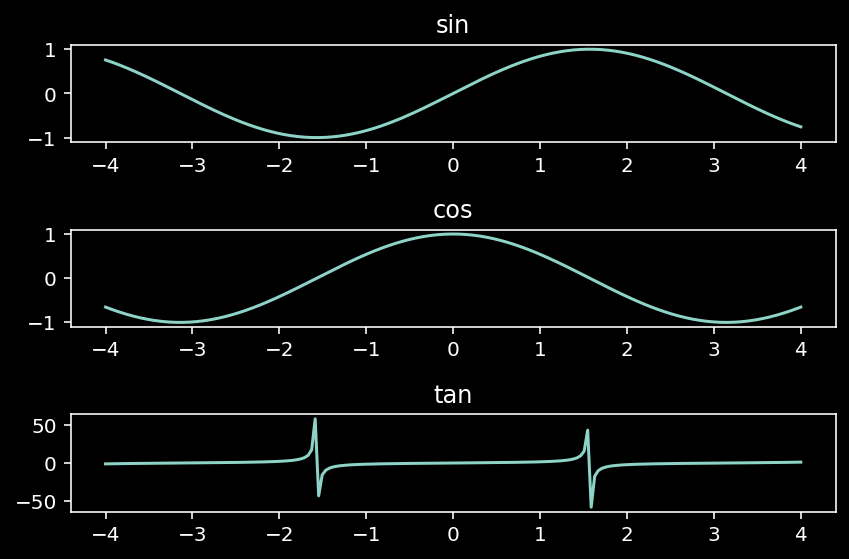

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.plot(x, sin)
ax1.set_title("sin")
ax2.plot(x, cos)
ax2.set_title("cos")
ax3.plot(x, tan)
ax3.set_title("tan")
plt.tight_layout()

### Hyperbolic functions

Hyperbolic functions are like trigonometric functions but for the hyperbola rather than for the circle. `NumPy` also incorporate several cases (see [here](https://numpy.org/doc/stable/reference/routines.math.html#hyperbolic-functions)).

In [23]:
y = np.linspace(-4, 4, 200)

# sin function
sinh = np.sinh(y)
# cosine function
cosh = np.cosh(y)
# tangent function
tanh = np.tanh(y)

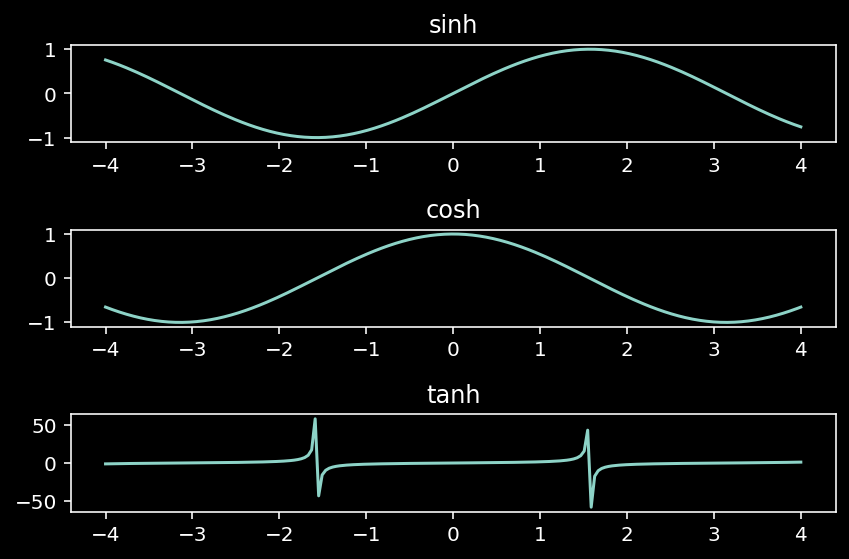

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.plot(y, sin)
ax1.set_title("sinh")
ax2.plot(y, cos)
ax2.set_title("cosh")
ax3.plot(y, tan)
ax3.set_title("tanh")
plt.tight_layout()

### Rounding

Rounding is a delicate subject as rounding errors when compounded over sequences of operations, can completely mess up your results. It is also a common operation for presenting and plotting results to others. Rounding is applied element-wise.

Let's generate a sequence of random decimal numbers to see the effect of different rounding procedures available in `NumPy` (see [here](https://numpy.org/doc/stable/reference/routines.math.html#rounding)).

In [25]:
decimals = np.linspace(0.11111111, 0.99999999, 10)

# rounding
around = np.around(decimals, 3)
# rounding
round_ = np.round(decimals, 3)
# rounding to integer
rint = np.rint(decimals)
# rounding integer towards zero
fix = np.fix(decimals)
# round to the floor
floor = np.floor(decimals)
# round to the ceiling
ceil = np.ceil(decimals)

In [26]:
print(f"Array of decimals:\n{decimals}\n")
print(f"'around' round to the fiven number of decimals:\n{around}\n")
print(f"'round' yields identical results than 'around':\n{round_}\n")
print(f"'rint' round to the nearest integer:\n{rint}\n")
print(f"'fix' round to the nearest integer towars zero:\n{fix}\n")
print(f"'floor' round to the floor of the input:\n{floor}\n")
print(f"'ceil' round to the ceiling of the input:\n{ceil}")

Array of decimals:
[0.11111111 0.20987654 0.30864197 0.4074074  0.50617283 0.60493827
 0.7037037  0.80246913 0.90123456 0.99999999]

'around' round to the fiven number of decimals:
[0.111 0.21  0.309 0.407 0.506 0.605 0.704 0.802 0.901 1.   ]

'round' yields identical results than 'around':
[0.111 0.21  0.309 0.407 0.506 0.605 0.704 0.802 0.901 1.   ]

'rint' round to the nearest integer:
[0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]

'fix' round to the nearest integer towars zero:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

'floor' round to the floor of the input:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

'ceil' round to the ceiling of the input:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Exponents and logarithms

Exponents and logarithms are often used in computations related to probability and statistics. `NumPy` incorporate several of the common ones (see [here](https://numpy.org/doc/stable/reference/routines.math.html#exponents-and-logarithms)).

In [27]:
z = np.array([0.1, 1, np.e, np.pi])

# exponent
exp = np.exp(z)
# exponent(x) -1
expm1 = np.expm1(z)
# 2^P
exp2 = np.exp2(z)
# natural log
log = np.log(z)
# log base 10
log10 = np.log10(z)
# log base 2
log2 = np.log2(z)

In [28]:
print(f'Compute exponential element-wise:\n{exp}\n')
print(f"Compute 'exp(x) - 1' with greater precision for small values:\n{expm1}\n")
print(f"Compute '2**p' for all elements p in the array:\n{exp2}\n")
print(f'Compute natural logarithm element-wise:\n{log}\n')
print(f'Compute base 10 logarithm element-wise:\n{log10}\n')
print(f'Compute base 2 logarithm element-wise:\n{log2}\n')

Compute exponential element-wise:
[ 1.10517092  2.71828183 15.15426224 23.14069263]

Compute 'exp(x) - 1' with greater precision for small values:
[ 0.10517092  1.71828183 14.15426224 22.14069263]

Compute '2**p' for all elements p in the array:
[1.07177346 2.         6.58088599 8.82497783]

Compute natural logarithm element-wise:
[-2.30258509  0.          1.          1.14472989]

Compute base 10 logarithm element-wise:
[-1.          0.          0.43429448  0.49714987]

Compute base 2 logarithm element-wise:
[-3.32192809  0.          1.44269504  1.65149613]



### Other miscellaneous element-wise operations

There are several other common mathematical operations available in `NumPy`, that are routinely used at different stages of the data processing and modeling.

Here is a list of several important ones. As always, you can find more in the `NumPy` documentation.

In [29]:
array_1 = np.arange(-9,9, 2)
array_2 = np.arange(-9,9, 2).reshape((3,3))

# sum over
sum_1, sum_2, sum_3 = np.sum(array_1), np.sum(array_2, axis=0), np.sum(array_2, axis=1) 
# take product
prod_1, prod_2, prod_3 = np.prod(array_1), np.prod(array_2, axis=0), np.prod(array_2, axis=1)
# cumulative sum
cumsum_1, cumsum_2, cumsum_3 = np.cumsum(array_1), np.cumsum(array_2, axis=0), np.cumsum(array_2, axis=1)
# clip values
clip_1, clip_2 = np.clip(array_1, 2, 8), np.clip(array_2, 2, 8)
# take absolute value
absolute_1, absolute_2 = np.absolute(array_1), np.absolute(array_2) 
# take square root
sqrt_1, sqrt_2 = np.sqrt(np.absolute(array_1)), np.sqrt(np.absolute(array_2)) 
# take the square power
square_1, square_2 =  np.square(array_1), np.square(array_2)
# sign function
sign_1, sign_2 = np.sign(array_1), np.sign(array_2)
# n power
power = np.power(np.absolute(array_1), np.absolute(array_1))

In [30]:
print(f"'sum-1' sum array elements:{sum_1}\n"f"'sum-2' sum rows:{sum_2}\n"f"'sum-3' sum cols:{sum_3}\n")
print(f"'prod-1' product array elements:{prod_1}\n"f"'prod-2' product rows: {prod_2}\n"f"'prod-3' product cols: {prod_3}\n")
print(f"'cumsum_1' cumulative sum array elements:\n{cumsum_1}\n"f"'cumsum_2' cumulative sum rows:\n{cumsum_2}\n"f"'cumsum_3' cumulative sum cols:\n{cumsum_3}\n")
print(f"'clip-1' limit range of values (2-8):\n{clip_1}\n"f"'clip-2' limit range of values (2-8):\n{clip_2}\n")
print(f"'absolute-1' absolute value array elements:\n{absolute_1}\n"f"'absolute-2' absolute value array elements:\n{absolute_2}\n")
print(f"'sqrt-1' non-negative square root array elements:\n{sqrt_1}\n"f"'sqrt-2' non-negative square root array elements:\n{sqrt_2}\n")
print(f"'square-1' square array elements: \n{square_1}\n"f"'square-2' square array elements: \n{square_2}\n")
print(f"'sign-1' sign indication of array elements:\n{sign_1}\n"f"'sign-2' sign indication of array elements:\n{sign_2}\n")
print(f"'power' elements of first array raised to powers from the second:\n{power}\n")

'sum-1' sum array elements:-9
'sum-2' sum rows:[-9 -3  3]
'sum-3' sum cols:[-21  -3  15]

'prod-1' product array elements:-99225
'prod-2' product rows: [ 81  35 -35]
'prod-3' product cols: [-315    3  105]

'cumsum_1' cumulative sum array elements:
[ -9 -16 -21 -24 -25 -24 -21 -16  -9]
'cumsum_2' cumulative sum rows:
[[ -9  -7  -5]
 [-12  -8  -4]
 [ -9  -3   3]]
'cumsum_3' cumulative sum cols:
[[ -9 -16 -21]
 [ -3  -4  -3]
 [  3   8  15]]

'clip-1' limit range of values (2-8):
[2 2 2 2 2 2 3 5 7]
'clip-2' limit range of values (2-8):
[[2 2 2]
 [2 2 2]
 [3 5 7]]

'absolute-1' absolute value array elements:
[9 7 5 3 1 1 3 5 7]
'absolute-2' absolute value array elements:
[[9 7 5]
 [3 1 1]
 [3 5 7]]

'sqrt-1' non-negative square root array elements:
[3.         2.64575131 2.23606798 1.73205081 1.         1.
 1.73205081 2.23606798 2.64575131]
'sqrt-2' non-negative square root array elements:
[[3.         2.64575131 2.23606798]
 [1.73205081 1.         1.        ]
 [1.73205081 2.23606798 2.64

## Array data type and conversions

I mentioned `NumPy` arrays can contain a single data type. This constraint makes data storing and manipulation much more efficient than working with mixed type arrays (like Python lists), which is a priority for `NumPy`. 

Data types in `NumPy` is a relatively complicated subject, particularly if you are not familiar with C or memory allocation. For our purposes, some basic data types are worth knowing: 

1. `np.bool_`: used to represent "Booleans" (True or False)
2. `np.int`: used to integers numbers 
3. `np.unit`: used to represent positive integers or "unsigned" integers
4. `np.float`: used to represent real numbers (decimals, fractions, etc) or "floating point" numbers  
5. `np.complex`: used to represent complex numbers

In my experience, booleans, integers, and float point data types are the ones that you end up using the most. At least explicitly. Other data types are used all the time, but you do not have to worry about it because `NumPy` takes care of it for you. Since Python is a "dynamically typed" language, which simply means that you do not have to tell the computer what data type you will use (Python does this for you), most of the time you do not need to indicate which data type you will use. 

For instance, if you simply define and an array of values, `NumPy` will decide what data type to allocate for each: 

In [31]:
bools = np.array([True, False])
ints = np.full((2,2), 1)
floats = np.ones(5)
unsigned = np.arange(3, dtype=np.uint8)
complexs = np.array([+1j, +2j, +3j])
unicode = np.array(["Catbug", "Chris", "Danny", "Wallow", "Beth"])

In [32]:
print(f'Booleans :{bools.dtype}')
print(f'Integers :{ints.dtype}')
print(f'Floats :{floats.dtype}')
print(f'Unsigned :{unsigned.dtype}')
print(f'Complexs :{complexs.dtype}')
print(f'Unicode :{unicode.dtype}')

Booleans :bool
Integers :int64
Floats :float64
Unsigned :uint8
Complexs :complex128
Unicode :<U6


In some instances, you may want to explicitly indicate the data type. Here are some examples of how you can do that:

In [33]:
int_16 = np.array([1, 2, 3, 4], dtype='int16')
float_32 = np.array([1, 2, 3, 4], dtype='float32')
unsigned_int_8 = np.arange(3, dtype='uint8')

In [34]:
print(f'Integer 16 bytes data type: { int_16.dtype}')
print(f'Float 32 bytes data type: {float_32.dtype}')
print(f'Unsigned integer 8 bytes data type: {unsigned_int_8.dtype}')

Integer 16 bytes data type: int16
Float 32 bytes data type: float32
Unsigned integer 8 bytes data type: uint8


Note that the numbers after the data type, like 8, 16, 32, and 64, indicate the number of bytes is allocated to represent each element of the array. The higher the number, the more memory.

There are several reasons why you may want to explicitly indicate the data type. One of the most common reasons is **memory efficiency**. If you know your range of numbers in a variable is small positive numbers, utilizing 8 bytes unsigned integers will use significantly less memory than a 32 bytes integer. Now, this will be an issue only with massive datasets, meaning datasets that make your computer to have difficulty processing your data, as it is not clear what "massive" means without context. 

A final operation you may want to do, is **to change the data type of an array**. For instance, let's say you want to stack two arrays, but one has a floating-point data type and the other integers. Recall that `NumPy` arrays can have a single data type. Let's see an example.

In [35]:
int_array = np.arange(10, dtype='int')
float_array = np.arange(10, dtype='float')

In [36]:
print(f'Array 1: {int_array}, data type:{int_array.dtype}')
print(f'Array 2: {float_array}, data type:{float_array.dtype}')

Array 1: [0 1 2 3 4 5 6 7 8 9], data type:int64
Array 2: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.], data type:float64


Let's first stack the arrays as they are:

In [37]:
stacked_arrays = np.stack((int_array, float_array))

In [38]:
print(f'Stacked arrays as they are:\n{stacked_arrays},\ndata type:{stacked_arrays.dtype}')

Stacked arrays as they are:
[[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]],
data type:float64


As you can see, `NumPy` "upcasted" the data type of lower precision, the `int64`, to the data type of higher precision, the `float64`. This is simply because `int64` can't represent float point or real numbers, only integers or natural numbers. But `float64` can represent integers. So it is the smart choice to make things work. 

Now, you may want to keep everything as integers, for whatever reason. If so, this is what you need to do. First, convert the `float64` array to an `int64` array as:

In [39]:
int_array_2 = float_array.astype('int64')

And now stack things together. 

In [40]:
stacked_arrays_2 = np.stack((int_array, int_array_2))

In [41]:
print(f'Stacked arrays after conversion:\n{stacked_arrays_2},\ndata type:{stacked_arrays_2.dtype}')

Stacked arrays after conversion:
[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]],
data type:int64


There you go, the array is composed by integers of 64 bytes now. 

Let's say you want to save memory by converting the new array to a **lower byte representation**, like int 8. This is known as "downcasting", i.e., the opposite of "upcasting". For this you simply need to:

In [42]:
stacked_arrays_3 = stacked_arrays_2.astype('int8')

In [43]:
print(f'Stacked arrays after downcasting:\n{stacked_arrays_3},\ndata type:{stacked_arrays_3.dtype}')

Stacked arrays after downcasting:
[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]],
data type:int8


You can check and compare the memory "footprint" of each array as:

In [44]:
print(f'Memory size Int64 array:{stacked_arrays_2.nbytes}')
print(f'Memory size Int8 array:{stacked_arrays_3.nbytes}')

Memory size Int64 array:160
Memory size Int8 array:20


The memory footprint has been reduced by a factor of 8. This may not sound like a lot, but if you are working with a dataset of size, let's say, 8 gigabytes, you can reduce such memory usage to only 1 gigabyte, which will also do data manipulation faster. 

## Array manipulation

The shape of an array is given by the number of elements along each axis. Now, if you think in an array as composed by little boxes or LEGO pieces, you can start to think of how those pieces can be rearranged in different shapes. For example, a 2 x 2 array could be "flattened" to be a 1 x 4 array, or maybe you could "swap" the rows and columns of the array, by moving the little boxes around or even take away a couple of pieces reducing the array to a 1 x 2 shape.

These kinds of operations are extremely common in any kind of data manipulation, and it is one of the most important skills to acquire. Some people prefer to convert `NumPy` arrays to `Pandas` DataFrames, as `Pandas` provide several easy to use functions to manipulate arrays. Nonetheless, manipulating arrays in `NumPy` it is not that much harder, it can save you time and effort by preventing you to going back and forth with `Pandas`, and well, this is a `NumPy` tutorial, so we are here to learn `NumPy` way. 

### Array shape manipulation

Arrays can be changed with or without changing is data. This is equivalent to the difference between rearranging LEGO blocks with or without adding/removing pieces. 

The `reshape` method changes the shape of an array *without* changing its data. 

In [45]:
array_1 = np.array([[1, 2, 3],
                    [4, 5, 6]])

print(f'Array-1 shape: {array_1.shape}')

Array-1 shape: (2, 3)


Array-1 has shape (2, 3), meaning it has 2 rows and 3 columns. 

In [46]:
# the two syntaxs below are equivalent
array_2 = array_1.reshape(3,2) 
array_3 = np.reshape(array_1, (1,6))

In [47]:
print(f'Array-2:\n{array_2},\nshape: {array_2.shape}\n')
print(f'Array-3:\n{array_3},\nshape: {array_3.shape}')

Array-2:
[[1 2]
 [3 4]
 [5 6]],
shape: (3, 2)

Array-3:
[[1 2 3 4 5 6]],
shape: (1, 6)


Array-2 and Array-3 preserve the number of elements of Array-1.

**Flattening** an array, this is, collapsing all values into a single axis or dimension, can be done in two manners:

In [48]:
array_1_ravel = array_1.ravel()
array_1_flatt = array_1.flatten()

In [49]:
print(f'Array-1 ravel:\n{array_1_ravel},\nshape: {array_1_ravel.shape}\n')
print(f'Array-1 flattened:\n{array_1_flatt},\nshape: {array_1_flatt.shape}')

Array-1 ravel:
[1 2 3 4 5 6],
shape: (6,)

Array-1 flattened:
[1 2 3 4 5 6],
shape: (6,)


Why on earth are there two methods to do exactly the same? The answer is that they are not doing the same: `ravel()` returns a '**view**' of the original array, whereas `flatten()` returns an independent '**copy**' of it. Views or images are just "pointers" to the original array in memory, whereas copies have their own space in memory. I'll cover this in-depth later.

Another thing you might have realized is that Array-3 has the same elements as Array-1-ravel and Array-1-flattened, but it has an extra pair of `[]` and shape `(1,6)` instead of `(,6)`. What is going on here? 

Put simply, internally, `NumPy` arrays have two parts: the information itself and information about how to interpret/read the array. In the case of the shape information, this indicates how many "indices" are associated with an array. The `(1,6)` is saying that there **two indices** identifying the array: the number 1 for all the elements, and the numbers from 1 to 6 for each element. This makes sense if you think in arrays as matrices or excel sheets: the first element is in the first row and first column (1,1), the second in the first row and the second column (1, 2), and so on.

However, If you think about it, you don't need two indices to identify the elements of a one-dimensional array. After all, when we count things we do not count "1 and 1, 1 and 2, 1 and 3, 1 and 4..." and so on. The `(6,)` is just saying that there is a **single index** identifying each of the 6 elements of the array, which makes perfect sense. The first element of the array is in position one (1,), the second in position two (2,), and so on. 

Now you may be wondering. Why then add a 1 as an index if it's unnecessary? Since `NumPy` supports multi-dimensional arrays, technically, the `(1,6)` is indicating the array has TWO dimensions or axes instead of one. "BUT, the array has just one dimension, right?" Yes and no. The thing is such array can be represented as either: as a collection of elements along one dimension or as a collection of elements along two dimensions, with the caveat that the first dimension has all the data, and the other is basically "empty" or "flat", but assigned to it. Just like with the first element is in the first row and first column (1,1)" idea. 

If you are familiar with linear algebra or geometry, you should know that a square is an object with two dimensions, but that can 'live' in three, four, five, a million, or any number of dimensions. Essentially, higher-dimensional spaces can contain objects with fewer dimensions, but not the other way around. You can't fit a sphere in a plane. The misunderstanding, in my view, comes from the tendency to think in data as two-dimensional grid-like objects, when in practice does not need to be like that *necessarily*. People like to think in `NumPy` arrays as matrices, vectors, tensors, etc., but they aren't, they are arrays with one or more dimensions. Period. 

This whole discussion may sound like I am beating around the bushes, but I am not. Dimensionality mismatch is one of the most important sources of errors, misunderstandings, and frustrations when working with `NumPy` arrays. If you ever do anything related to linear algebra, like pretty much all of machine learning and statistics, you need to have a firm understanding of how dimensions work in `NumPy`. 

### Array transpose-like operations

**Transposing** means to "swap" or interchange the position and elements between two or more axes. 

The most common operation is the plain **Transpose** operation, where the axes get permuted.  

In [50]:
array_1 = np.arange(4).reshape((2,2))# two dimensional array
array_2 = np.arange(12).reshape((3,2,2)) # three dimensional array

In [51]:
print(f'Array-1:\n{array_1},\nshape:{array_1.shape}\n')
print(f'Array-2:\n{array_2},\nshape:{array_2.shape}')

Array-1:
[[0 1]
 [2 3]],
shape:(2, 2)

Array-2:
[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]],
shape:(3, 2, 2)


Now let's transpose both:

In [52]:
array_1_T = array_1.T
array_2_T = array_2.T

In [53]:
print(f'Array-1 transposed:\n{array_1_T},\nshape:{array_1_T.shape}\n')
print(f'Array-2 transposed:\n{array_2_T},\nshape:{array_2_T.shape}')

Array-1 transposed:
[[0 2]
 [1 3]],
shape:(2, 2)

Array-2 transposed:
[[[ 0  4  8]
  [ 2  6 10]]

 [[ 1  5  9]
  [ 3  7 11]]],
shape:(2, 2, 3)


Array-1 has swapped the rows for the columns. Array-2 has reshaped from a three 2x2 arrays, into two 2x3 arrays. This is because of the indices "cycle" such that the third index pass to the first place, the second to the third, and the first to the second.

The `moveaxis` method is more flexible than transpose as it allows for an arbitrary rearrangement of axes to new positions. The syntax is simple: `np.moveaxis(original-array, origin-position-axis-to-move, destiny-position-axis-to-move)`. Recall that axes are index as (0, 1, 2, ...0).

In [54]:
array_move_2_3_4 = np.arange(24).reshape((2,3,4))
array_move_2_4_3 = np.moveaxis(array_move_2_3_4, 2, 1) # move axis in position two to position one
array_move_3_2_4 = np.moveaxis(array_move_2_3_4, 0, 1) # move axis in position zero to position one
array_move_3_4_2 = np.moveaxis(array_move_2_3_4, 0, 2) # move axist in the zero position to position two
array_move_4_2_3 = np.moveaxis(array_move_2_3_4, [2, 1], [0, 2]) # move axes in positions two and one, to positions zero and two
array_move_4_3_2 = np.moveaxis(array_move_2_3_4, [2, 0], [0, 2]) # move axes in positions two and zero, to positions zero and two

In [55]:
print(f'Original order: {array_move_2_3_4.shape}\n')
print(f'New axes order 1: {array_move_2_4_3.shape}\n')
print(f'New axes order 2: {array_move_3_2_4.shape}\n')
print(f'New axes order 3: {array_move_3_4_2.shape}\n')
print(f'New axes order 4: {array_move_4_2_3.shape}\n')
print(f'New axes order 5: {array_move_4_3_2.shape}')

Original order: (2, 3, 4)

New axes order 1: (2, 4, 3)

New axes order 2: (3, 2, 4)

New axes order 3: (3, 4, 2)

New axes order 4: (4, 2, 3)

New axes order 5: (4, 3, 2)


### Array dimension manipulation

Intentionally changing the dimensions of arrays is an operation done mostly, in my experience, when you want to combine arrays or to do mathematical operations with two or more arrays. In the dimensions do not match or are not defined in a certain manner, joining or calculations won't work, or would work in unexpected manners.

In this section, I'll mention just two operations: **expanding dimensions** and **squeezing dimensions**, which are opposite operations. There is a third extremely important dimension manipulation operation: broadcasting. Broadcasting is not just important but rather complicated to explain so I will give its own section after this one. 

Expanding dimensions it is always possible as higher-dimensional objects can always contain lower-dimensional objects: you can fit a two-dimensional piece of paper inside a three-dimensional box, but not the other way around (I know! paper is three dimensional, but I hope you get the point). 

In [56]:
array_one = np.array([1, 2, 3])
array_two = np.array([[1, 2, 3], [4, 5, 6]])
array_one_expand =  np.expand_dims(array_one, axis=0)
array_two_expand =  np.expand_dims(array_two, axis=0)

In [57]:
print(f'One dimensional array: \n{array_one} \nshape: {array_one.shape}\n')
print(f'One dimensional array expanded: \n{array_one_expand} \nshape: {array_one_expand.shape}\n')
print(f'Two dimensional array: \n{array_two} \nshape: {array_two.shape}\n')
print(f'Two dimensional array expanded: \n{array_two_expand} \nshape: {array_two_expand.shape}\n')

One dimensional array: 
[1 2 3] 
shape: (3,)

One dimensional array expanded: 
[[1 2 3]] 
shape: (1, 3)

Two dimensional array: 
[[1 2 3]
 [4 5 6]] 
shape: (2, 3)

Two dimensional array expanded: 
[[[1 2 3]
  [4 5 6]]] 
shape: (1, 2, 3)



As you can see, both arrays gain an extra dimension when expanded. 

Let's bring the arrays back to their original dimensionality with the opposite operation: squeezing. 

In [58]:
array_one_squeez =  np.squeeze(array_one_expand, axis=0)
array_two_squeez =  np.squeeze(array_two_expand, axis=0)

In [59]:
print(f'Three dimensional array squeezed: \n{array_one_squeez} \nshape: {array_one_squeez.shape}\n')
print(f'Three dimensional array squeezed: \n{array_two_squeez} \nshape: {array_two_squeez.shape}')

Three dimensional array squeezed: 
[1 2 3] 
shape: (3,)

Three dimensional array squeezed: 
[[1 2 3]
 [4 5 6]] 
shape: (2, 3)


We can check the squeezed arrays have the same dimensionality that the original ones as:

In [60]:
print(f'Are dimensions for array-one and array-one-squeezed equal?: {array_one.shape == array_one_squeez.shape}\n')
print(f'Are dimensions for array-two and array-two-squeezed equal?: {array_two.shape == array_two_squeez.shape}')

Are dimensions for array-one and array-one-squeezed equal?: True

Are dimensions for array-two and array-two-squeezed equal?: True


### Array broadcasting

**Broadcasting** is an automatic `NumPy` mechanism to match the dimensionality of arrays with different shapes for element-wise operations. Broadcasting usually improves speed by means of vectorizing operations, meaning that the loop will occur in compiled C code rather than in Python, as Python looping us is resource-intensive and slow. However, there are some cases where broadcasting is not the best option. 

In the array mathematics section, we saw `NumPy` performs several important computations element-wise, which requires having arrays with matching shapes: arrays of shape (,1), (2,2), and (4,3,2), must be multiplied by arrays with shape (,1), (2,2), and (4,3,2), to be compatible. However, there are cases where we want to multiplied arrays with shapes that do not match, for instance: 

$$\textit{A} x =
\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}
2
$$

Following linear algebra conventions, we should multiply each element of $\textit{A}$ by 2. The way to get around in this in `NumPy`, is by **broadcasting** the scalar to match the shape of $\textit{A}$ as:

$$\textit{A} x =
\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}
\begin{bmatrix}
2 & 2 \\
2 & 2
\end{bmatrix} =
\begin{bmatrix}
2 & 4 \\
6 & 8
\end{bmatrix}
$$

The scalar only gets "stretched" vertically and horizontally during computation. Now, creating copies of $x$ is memory inefficient, so `NumPy` does not actually copy the value in memory. This is slightly inaccurate, but in a nutshell, broadcasting works by reusing the original value  (the   This may not be evident in the $\textit{A}x$ example, but just imagine a (1,000,000, 100) array. In such a case, `NumPy` would have to duplicate the size of the dataset, i.e., to create 100,000,000 of values just to perform matrix-scalar multiplication.   

Not all arrays can be broadcast. They must meet certain conditions, the "Broadcasting rule", which according to the `NumPy` documentation states:

"In order to broadcast, the size of the trailing axes for both arrays in an operation must either be the same size or one of them must be one."

This is easier to understand visually. The figure below shows the cases where broadcasting is valid, and the next one when it is not.

<img src="images/broadcasting.svg">

For instance:

In [61]:
a = np.ones((2,2))
b = np.ones (1)

In [62]:
print(f'(2,2) array:\n{a}\nshape: {a.shape}]\n')
print(f'(1, ) array:\n{b}\nshape: {b.shape}]\n')
print(f'Element-wise operations are valid between a and b:\n{a + b}')

(2,2) array:
[[1. 1.]
 [1. 1.]]
shape: (2, 2)]

(1, ) array:
[1.]
shape: (1,)]

Element-wise operations are valid between a and b:
[[2. 2.]
 [2. 2.]]


Invalid operations are variations of:

<img src="images/invalid-broadcasting.svg">

We can verify that the above operation does not work: 

In [63]:
a = np.ones((2,2))
b = np.ones((3))

In [64]:
# a + b 

In this case, we get a "ValueError: operands could not be broadcast together" error message. 

Most of the time you won't need to think in dimension matching beforehand. Either it will work or `NumPy` will let you know dimensions do not match. The important part is to be aware of broadcasting mechanics such that you can debug dimension mismatch problems rapidly. 

### Joining arrays

Joining arrays is another common operation in data processing, particularly to put together data coming from different sources. For instance, large datasets are commonly split into several sub-datasets containing different features or variables associated with the same population.

[Here](https://numpy.org/doc/stable/reference/routines.array-manipulation.html#joining-arrays) are all the joining methods in `NumPy`. Below a couple of the main methods. 

In [65]:
base_array = np.arange(1,10).reshape((3,3))
join_array = np.arange(1,4).reshape((1,3))

concatenate = np.concatenate((base_array, join_array), axis=0)
stack = np.stack((base_array, base_array))
hstack = np.hstack((base_array, join_array.T))
vstack = np.vstack((base_array, join_array))

To **concatenate** arrays must have at least one equal dimension, which must be defined as the axis reference. Here we concatenate along the first axis (rows match). If you try to concatenate along the second axis the operation will fail (columns do not match).

In [66]:
print(f'Row-wise concatenation:\n{concatenate}\n')

Row-wise concatenation:
[[1 2 3]
 [4 5 6]
 [7 8 9]
 [1 2 3]]



To **stack** arrays, all the arrays must have the same dimensions. The logic here is to generate an array with an extra dimension, like stacking LEGO pieces with the same shape. 

In [67]:
print(f'Stacking:\n{stack}\n')
print(f'shape before stacking:{base_array.shape}\nshape after stacking:{stack.shape}')

Stacking:
[[[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[1 2 3]
  [4 5 6]
  [7 8 9]]]

shape before stacking:(3, 3)
shape after stacking:(2, 3, 3)


**Horizontal stacking** (`hstack`) and **vertical stacking** (`vstack`), stack arrays along the horizontal and vertical axes, i.e., column-wise and row-wise, meaning that the array will "grow" horizontally (attached to the right) and vertically (attached below), respectively.

In most cases, the same effect can be accomplished with the concatenation method along axis 1 (cols) and axis 0 (rows). To work, **horizontal stacking** must match along all axes but the first one, the first one being the horizontal one, or "the rows" in the 2-dimensional case. This is why we had to transpose the `join_array`, such that rows match. In other words, you can have an arbitrary number of columns but everything else must match. **Vertical stacking** is analogous: you can have an arbitrary number of rows, but columns must match. 

In [68]:
print(f'Horizontal-wise or column-wise stacking:\n{hstack}\n')
print(f'Vertical-wise or row-wise stacking:\n{vstack}\n')

Horizontal-wise or column-wise stacking:
[[1 2 3 1]
 [4 5 6 2]
 [7 8 9 3]]

Vertical-wise or row-wise stacking:
[[1 2 3]
 [4 5 6]
 [7 8 9]
 [1 2 3]]



### Splitting arrays

Splitting arrays is common when you want to analyze, model, or plot a subset of the data. Also when your data size is enormous and you want to save it in chunks. 

[Here](https://numpy.org/doc/stable/reference/routines.array-manipulation.html#splitting-arrays) are all the `NumPy` splitting functions. Let's explore a couple.

In [69]:
array_one = np.arange(9)
array_two = np.arange(8).reshape((2,2,2))

split_one, split_two = np.split(array_one, 3), np.split(array_two, 2) 
array_split_one, array_split_two = np.array_split(array_one, 2), np.array_split(array_two, 3)
hsplit_one = np.hsplit(array_one, 3)
hsplit_two, vsplit_two = np.hsplit(array_two, 2), np.vsplit(array_two, 2)

The `split` method will work as long as you ask for a number of sub-arrays which can be obtained via equal division of the original array. For instance, `array_one` can be equally divided into two arrays.

In [70]:
print(f'Array one (9,):\n{array_one.shape}\n')
print(f'Array two (2,2,2):\n{array_two.shape}\n')
print(f'Array one is split into 3 (1,3) sub-arrays:\n{split_one[0]}\n{split_one[1]}\n{split_one[2]}\n') 
print(f'Array two is split into 2 (1,2,2) sub-arrays:\n{split_two[0]}\n{split_two[1]}\n') 

Array one (9,):
(9,)

Array two (2,2,2):
(2, 2, 2)

Array one is split into 3 (1,3) sub-arrays:
[0 1 2]
[3 4 5]
[6 7 8]

Array two is split into 2 (1,2,2) sub-arrays:
[[[0 1]
  [2 3]]]
[[[4 5]
  [6 7]]]



The `array_split` function provides identical functionality than the `array` function, with the difference that it will work even when the original array cannot be equally divided into the requested number of sub-arrays. Basically, if you try to split the array one (9,) into 2, the operation will work and the last number (the "9") will be completely ignored. On the other hand, if you try to split an array two (2,2,2) into 3 parts, it will generate  an extra empty axis.

In [71]:
print(f'Array one split into 2 sub-arrays:\n{array_split_one[0]}\n{array_split_one[1]}\n')
print(f'Array two split into 3 sub-arrays:\n{array_split_two[0]}\n{array_split_two[1]}\n{array_split_two[2]}\n')

Array one split into 2 sub-arrays:
[0 1 2 3 4]
[5 6 7 8]

Array two split into 3 sub-arrays:
[[[0 1]
  [2 3]]]
[[[4 5]
  [6 7]]]
[]



As with concatenation, horizontal split (`hsplit`) and vertical split (`vsplit`) provide equivalent functionality than the split method (`split`), but restricted to the horizontal and vertical axis respectively. Equal division is also a constrain here. Array one can't be split vertically because it has only one dimension. 

In [72]:
print(f'Array one horizontal split into 3 sub-arrays:\n{hsplit_one[0]}\n{hsplit_one[1]}\n{hsplit_one[2]}\n')
print(f'Array two horizontal split into 2 sub-arrays:\n{hsplit_two[0]}\n{hsplit_two[1]}\n')
print(f'Array two horizontal split into 2 sub-arrays:\n{vsplit_two[0]}\n{vsplit_two[1]}')

Array one horizontal split into 3 sub-arrays:
[0 1 2]
[3 4 5]
[6 7 8]

Array two horizontal split into 2 sub-arrays:
[[[0 1]]

 [[4 5]]]
[[[2 3]]

 [[6 7]]]

Array two horizontal split into 2 sub-arrays:
[[[0 1]
  [2 3]]]
[[[4 5]
  [6 7]]]


### Array repetition

Arrays can be constructed or expanded via repetition. Data simulation and image manipulation are situations where you may want to use this functionality. 

There are two `NumPy` methods that may look similar at first but they are not: **tiling** and **repetition**. 

In [73]:
array_one = np.arange(1,4)
array_two = np.arange(1,10).reshape((3,3))

tile_one, tile_two, tile_three, tile_four = np.tile(array_one, (1,2)), np.tile(array_one, (2,1)), np.tile(array_two, (1,2)), np.tile(array_two, (2,1))  
repeat_one, repeat_two = np.repeat(array_one, 2, axis=0), np.repeat(array_two, 2) 
repeat_three, repeat_four = np.repeat(array_two, 2, axis=1), np.repeat(array_two, 2, axis=0)

**Tiling** will attach an entire copy of the array (as a block) at its right or below it. The number of copies attached is specified as a tuple, with the first indicating the number of "rows" copies and the second the number of "column" copies.

In [74]:
print(f'Repeat array one twice column-wise:\n{tile_one}\n')
print(f'Repeat array one twice row-wise:\n{tile_two}\n')
print(f'Repeat array two twice column-wise:\n{tile_three}\n')
print(f'Repeat array twotwice  row-wise:\n{tile_four}\n')

Repeat array one twice column-wise:
[[1 2 3 1 2 3]]

Repeat array one twice row-wise:
[[1 2 3]
 [1 2 3]]

Repeat array two twice column-wise:
[[1 2 3 1 2 3]
 [4 5 6 4 5 6]
 [7 8 9 7 8 9]]

Repeat array twotwice  row-wise:
[[1 2 3]
 [4 5 6]
 [7 8 9]
 [1 2 3]
 [4 5 6]
 [7 8 9]]



The **repeat** method will replicate the **elements** of the array in place. For instance:

$$
\begin{bmatrix}
1 & 2
\end{bmatrix}
$$ 

Will be repeated as: 

$$
\begin{bmatrix}
1 & 1 & 2 & 2
\end{bmatrix}
$$ 

Instead as:

$$
\begin{bmatrix}
1 & 2 & 1 & 2
\end{bmatrix}
$$ 

The latter behavior is expected from the tile method instead. The axis for repetition is specified independently as "axis=0" for rows and "axis=1" for columns. 

In [75]:
print(f'Repeat array one twice row-wise:\n{repeat_one}\n')
print(f'Repeat array two twice and flattened into one dimension:\n{repeat_two}\n')
print(f'Repeat array two twice column-wise:\n{repeat_three}\n')
print(f'Repeat array two twice row-wise:\n{repeat_four}\n')

Repeat array one twice row-wise:
[1 1 2 2 3 3]

Repeat array two twice and flattened into one dimension:
[1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9]

Repeat array two twice column-wise:
[[1 1 2 2 3 3]
 [4 4 5 5 6 6]
 [7 7 8 8 9 9]]

Repeat array two twice row-wise:
[[1 2 3]
 [1 2 3]
 [4 5 6]
 [4 5 6]
 [7 8 9]
 [7 8 9]]



In [76]:
repeat_three, repeat_four

(array([[1, 1, 2, 2, 3, 3],
        [4, 4, 5, 5, 6, 6],
        [7, 7, 8, 8, 9, 9]]),
 array([[1, 2, 3],
        [1, 2, 3],
        [4, 5, 6],
        [4, 5, 6],
        [7, 8, 9],
        [7, 8, 9]]))

### Adding and removing array elements

There are several `NumPy` methods to add and remove elements from arrays. You may want to do this to clean a dataset, subset datasets, combine dataset, or maybe just playing a prank on someone 🤷.

In [77]:
array_one = np.arange(1,4)
array_two = np.arange(1,10).reshape((3,3))
array_three = np.array([[1, 1, 2, 2],
                        [1, 1, 2, 2],
                        [2, 2, 3, 3],
                        [2, 2, 3, 3]])

delete_one, delete_two, delete_three = np.delete(array_one, 2), np.delete(array_two, 0, 1), np.delete(array_two, 1, 0) 
insert_one, insert_two, insert_three, insert_four = np.insert(array_one, 1, 9), np.insert(array_two, 5, 9), np.insert(array_two, 1, 9, axis=0), np.insert(array_two, 1, 9, axis=1) 
unique_one, unique_two, unique_three = np.unique(array_three), np.unique(array_three, axis=0), np.unique(array_three, axis=1)

The **delete** method remove elements along the specified axis. In essence, you have to index the sub-array you want to remove to the method call.

In [78]:
print(f'Array one:\n{array_one}\n')
print(f'Array two:\n{array_two}\n')
print(f'Delete element in position 2 in array one:\n{delete_one}\n')
print(f'Delete column (along axis 1) in position 0 in array two:\n{delete_two}\n')
print(f'Delete row (along axis 0) in position 2 in array two:\n{delete_three}\n')

Array one:
[1 2 3]

Array two:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Delete element in position 2 in array one:
[1 2]

Delete column (along axis 1) in position 0 in array two:
[[2 3]
 [5 6]
 [8 9]]

Delete row (along axis 0) in position 2 in array two:
[[1 2 3]
 [7 8 9]]



The **insert** method will insert elements along the specified axis. If no axis is specified the value will be inserted in a flattened version of the array. To insert values you also have to indicate the position index.

In [79]:
print(f'Insert a "9" at position 1 in array one:\n{insert_one}\n')
print(f'Insert a "9" at position 5 in array two:\n{insert_two}\n')
print(f'Insert a sub-array of "9s" at position 1 in array two along axis 0 (rows):\n{insert_three}\n')
print(f'Insert a sub-array of "9s" at position 1 in array two along axis 1 (cols):\n{insert_four}\n')

Insert a "9" at position 1 in array one:
[1 9 2 3]

Insert a "9" at position 5 in array two:
[1 2 3 4 5 9 6 7 8 9]

Insert a sub-array of "9s" at position 1 in array two along axis 0 (rows):
[[1 2 3]
 [9 9 9]
 [4 5 6]
 [7 8 9]]

Insert a sub-array of "9s" at position 1 in array two along axis 1 (cols):
[[1 9 2 3]
 [4 9 5 6]
 [7 9 8 9]]



The **unique** method will return the unique elements along the specified axis. If no axis is provided the unique method will operate over a flattened version of the array. By unique we refer to the unique rows and columns as a whole, not the unique elements within a row or a column. 

In [80]:
print(f'Array three:\n{array_three}\n')
print(f'Unique elements flattened version array three:\n{unique_one}\n')
print(f'Unique elements along axis 0 (rows) array three:\n{unique_two}\n')
print(f'Unique elements along axis 1 (cols) array three:\n{unique_three}')

Array three:
[[1 1 2 2]
 [1 1 2 2]
 [2 2 3 3]
 [2 2 3 3]]

Unique elements flattened version array three:
[1 2 3]

Unique elements along axis 0 (rows) array three:
[[1 1 2 2]
 [2 2 3 3]]

Unique elements along axis 1 (cols) array three:
[[1 2]
 [1 2]
 [2 3]
 [2 3]]


### Rearranging array elements

By rearranging we refer to altering the order or position of the elements of an array without changing its shape (for that see the shape manipulation section). 

In [81]:
array_one = np.arange(1,10)
array_two = np.arange(1,10).reshape((3,3))

flip_one, flip_two, flip_three, flip_four = np.flip(array_one), np.flip(array_two), np.flip(array_two, 0), np.flip(array_two, 1) 
roll_one, roll_two, roll_three, roll_four = np.roll(array_one, 1), np.roll(array_two, 1), np.roll(array_two, 1, axis=0), np.roll(array_two, 1, axis=1) 

The **flip** reverse the order of elements in an array along the specified axis. If no axis is specified, the order of the elements is reversed as if it were a flattened array, but the shape is preserved. Notice that for arrays with 2 or more axis, flipping happens to entire rows or columns (or elements of the axis) rather than that to elements within rows or columns. There are many ways to flip an array by combining position and axis, here just a couple of examples.

In [82]:
print(f'Array one:\n{array_one}\n')
print(f'Array two:\n{array_two}\n')

print(f'Reverse array one:\n{flip_one}\n')
print(f'Reverse array two:\n{flip_two}\n')
print(f'Reverse array two along axis 0 (rows):\n{flip_three}\n')
print(f'Reverse array two along axis 1 (cols):\n{flip_four}\n')

Array one:
[1 2 3 4 5 6 7 8 9]

Array two:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Reverse array one:
[9 8 7 6 5 4 3 2 1]

Reverse array two:
[[9 8 7]
 [6 5 4]
 [3 2 1]]

Reverse array two along axis 0 (rows):
[[7 8 9]
 [4 5 6]
 [1 2 3]]

Reverse array two along axis 1 (cols):
[[3 2 1]
 [6 5 4]
 [9 8 7]]



The **roll** method moves or "push" elements in an array along the specified axis. This has the effect of moving all elements at once, so all get repositioned. There are many ways to roll an array by combining the number of positions to be roll and the axis, here just a couple of examples.

In [83]:
print(f'Array one:\n{array_one}\n')
print(f'Array two:\n{array_two}\n')

print(f'Roll elements array one by one position:\n{roll_one}\n')
print(f'Roll elements array two by one position:\n{roll_two}\n')
print(f'Roll elements array two by one position along axis 0 (rows):\n{roll_three}\n')
print(f'Roll elements array two by one position along axis 1 (cols):\n{roll_four}')

Array one:
[1 2 3 4 5 6 7 8 9]

Array two:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Roll elements array one by one position:
[9 1 2 3 4 5 6 7 8]

Roll elements array two by one position:
[[9 1 2]
 [3 4 5]
 [6 7 8]]

Roll elements array two by one position along axis 0 (rows):
[[7 8 9]
 [1 2 3]
 [4 5 6]]

Roll elements array two by one position along axis 1 (cols):
[[3 1 2]
 [6 4 5]
 [9 7 8]]
